**Proyecto de Simulación**: Simulated Annealing aplicado a coloreamiento de grafos

Integrantes: 
- Rodrigo Altamirano Montero
- Gonzalo Ovalle Jaque

In [114]:
!pip install networkx==2.8.8

import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
import scipy
# from time import time
import time
import Tabu_Search7 as ts



You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
#from collections import defaultdict
# converts from adjacency matrix to adjacency list
def convert(a):
    n = len(a)
    adjList = []
    for k in range(n):
        adjList.append([])
    for i in range(n):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adjList[i].append(j)
    return adjList

def timeSince(since):
    now = time.time_ns()
    s = now - since
    return s*10**(-9)

def quicksort(x):
    if len(x) == 1 or len(x) == 0:
        return x
    else:
        pivot = x[0]
        i = 0
        for j in range(len(x)-1):
            if x[j+1] < pivot:
                x[j+1],x[i+1] = x[i+1], x[j+1]
                i += 1
        x[0],x[i] = x[i],x[0]
        first_part = quicksort(x[:i])
        second_part = quicksort(x[i+1:])
        first_part.append(x[i])
        return first_part + second_part
    

def partition(n):
    part = [[] for i in range(n)]
    for k in range(n):
        u = random.choice(part)
        u.append(k)
     
    erase_list = []
    for p in range(len(part)):
        if part[p] == []:
            erase_list.append(p)
    erase_list.sort(reverse=True)
    for k in range(len(erase_list)):
        part.remove([])
    return part
def create_psets(coloring):   ##ver caso donde los colores no son desde 0 a max(coloring)
    part=[] 
    filtro = np.unique(coloring)
    for c in filtro:
        new_list=[]
        for i in range(len(coloring)):
            if coloring[i]==c:
                new_list.append(i)
        part.append(new_list)
    return part
def distribute(p_sets,part):
    for j in p_sets:
        u = random.choice(p_sets)

In [5]:
a = create_psets([1,2,3,4,2,3,3,5,0,3,5])
a

[[8], [0], [1, 4], [2, 5, 6, 9], [3], [7, 10]]

In [6]:
def clash_check(adj_list,coloring):
    for i in range(len(coloring)):
        for v in adj_list[i]:
            if coloring[v] == coloring[i]:
                return 0
    return 1

def set_check(v,partition):
    for i in range(len(partition)):
        if v in partition[i]:
            return i

def find_missing(coloring,color_list):
    for v in color_list:
        if v in coloring:
            pass
        else:
            return v
    return -1


In [13]:
def max_degree(adj_list,vertex_list):
    m = len(vertex_list)
    degrees = [[i,0] for i in vertex_list]
    c=0
    for k in vertex_list:
        degrees[c][1] = len(adj_list[k])
        c+=1
    max_deg = np.max([degrees[j][1] for j in range(m)])
    prob = []
    for p in vertex_list:
        if len(adj_list[p]) == max_deg:
            prob.append(p)
    choice = random.choice(prob)
    return choice


def vertex_satur(adj_list,coloring,vertex_list):
    m=len(vertex_list)
    sat = [[i,0] for i in vertex_list]
    c=0
    for i in vertex_list:
        for j in adj_list[i]:
            #print(j,adj_list[i])
            if coloring[j] != -1:
                sat[c][1] +=1
        c+=1
        
    
    max_sat= np.max([sat[k][1] for k in range(m)])
    options = []
    T=0
    for p in vertex_list:
        if sat[T][1]==max_sat:
            options.append(p)
        T+=1
    #print(options)
    return max_degree(adj_list,options)

def ind_check(adj_list,ind_set,vertex):
    for i in ind_set:
        if vertex in adj_list[i]:
            return 0
    return 1

In [14]:
def objective_function(adj_list,index,color,C):
    s=0
    for j in adj_list[index]:
        if C[j] == color:
            s+=1
    return s

In [15]:
def s_annealing(adj_list,t,p_sets):
    start = time.time_ns()
    actual_sets = p_sets
    n = len(adj_list)
    m=len(p_sets)
    B=0.8
    rate=1.005
    vertex = [i for i in range(n)]
    choices = [i for i in range(m)]      #posibles colores
    colors_used = np.zeros(t)
    coloring = np.zeros(n)  #coloreamiento inicial
    for i in range(m):
        for v in p_sets[i]:
            coloring[v]=i
    H = np.zeros(t)                           #valores de H
    H0 = 0
    for j in range(n):
        H0 = H0 + objective_function(adj_list,j,coloring[j],coloring)
    H0= H0/2 
    H[0]=H0
    candidates = []
    function_value = H0/2 + m
    color_min = m

    indexf=0
    for z in range(1,t):
        # hora = timeSince(start)
        # if hora > TIME:
        #     coloring_options = []
        #     for c in candidates:
        #         coloring_options.append(c[1])
        #     min_value = min(np.array([coloring_options]))
        #     answer=[]
        #     for f in candidates:
        #         if f[1] == min_value:
        #             answer = f
        #     tiempo_ejecucion = timeSince(start) 
        #     #answer[1] = colors_used[-1]
        #     return answer,colors_used,tiempo_ejecucion,H
            
        if clash_check(adj_list,coloring)==1:
            
            if indexf % 1500 == 0:
                B = B *rate
            v = random.choice(vertex)    
            new_color = random.choice(choices)
            c_swap = coloring
            c_swap[v]=new_color
            inicial_size = len(np.unique(coloring))
            new_size = len(np.unique(c_swap))
            delta1 = objective_function(adj_list,v,new_color,coloring)-objective_function(adj_list,v,coloring[v],coloring)
            delta2 = -inicial_size + new_size + delta1
            if delta2 <= 0:
                
                coloring[v]=new_color
                function_value = function_value + delta2
                colors_used[z] = len(np.unique(coloring))
                H[z]=H[z-1] + delta1
                if H[z]==0:
                    
                    color_min = min(colors_used[z],color_min)
                    V = [coloring,function_value] in candidates  #function_value
                    if V == True:
                        pass
                    if V == False:
                        candidates.append([coloring,function_value]) #funcion_value
                        
                    if colors_used[z] == color_min:
                        lc=len(choices)
                        cant_colors=np.zeros(len(choices))
                        for i in range(len(choices)):
                            for p in range(len(coloring)):
                                if coloring[p]==choices[i]:
                                    cant_colors[i] += 1
                        min_color = min(cant_colors)
                        for p in range(len(choices)):
                            if cant_colors[p] == min_color:
                                del choices[p]
                        for i in range(len(coloring)):
                            if coloring[i] == p:
                                coloring[i] = random.choice(choices)
                    
                    
                    
                

            if delta2 > 0:
                prob = np.exp(-B*delta)
                uniform = np.random.random()
                if uniform <= prob:
                    function_value = function_value + delta2
                    coloring[v]=new_color
                    colors_used[z] = len(np.unique(coloring))
                    H[z]=H[z-1] + delta1
                    
                        

                else:
                    H[z]= H[z-1] + objective_function(adj_list,v,new_color,coloring)-objective_function(adj_list,v,coloring[v],coloring)
                    colors_used[z] = len(np.unique(coloring))
            indexf += 1
        else:
            K = 0
            for j in range(n):
                K = K + objective_function(adj_list,j,coloring[j],coloring)
            H[z] = K/2
            
            if indexf % 1500 == 0:
                B = B *rate
            v = random.choice(vertex)    
            new_color = random.choice(choices)
            c_swap = coloring
            c_swap[v]=new_color
            inicial_size = len(np.unique(coloring))
            new_size = len(np.unique(c_swap))
            delta1 = objective_function(adj_list,v,new_color,coloring)-objective_function(adj_list,v,coloring[v],coloring)
            delta2 = -inicial_size + new_size + delta1
            if delta2 <= 0:
                
                coloring[v]=new_color
                function_value = function_value + delta2
                colors_used[z] = len(np.unique(coloring))
                H[z]=H[z] + delta1
                if H[z]==0:
                    
                    color_min = min(colors_used[z],color_min)
                    V = [coloring,function_value] in candidates  #function_value
                    if V == True:
                        pass
                    if V == False:
                        candidates.append([coloring,function_value]) #function_value
                        
                    if colors_used[z] == color_min:
                        lc=len(choices)
                        cant_colors=np.zeros(len(choices))
                        for i in range(len(choices)):
                            for p in range(len(coloring)):
                                if coloring[p]==choices[i]:
                                    cant_colors[i] += 1
                        min_color = min(cant_colors)
                        for p in range(len(choices)):
                            if cant_colors[p] == min_color:
                                del choices[p]
                        for i in range(len(coloring)):
                            if coloring[i] == p:
                                coloring[i] = random.choice(choices)
                    
                    
                    
                

            if delta2 > 0:
                prob = np.exp(-B*delta)
                uniform = np.random.random()
                if uniform <= prob:
                    function_value = function_value + delta2
                    coloring[v]=new_color
                    colors_used[z] = len(np.unique(coloring))
                    H[z]=H[z] + delta1
                    
                        

                else:
                    H[z]= H[z] + objective_function(adj_list,v,new_color,coloring)-objective_function(adj_list,v,coloring[v],coloring)
                    colors_used[z] = len(np.unique(coloring))
            indexf += 1

            
    
    coloring_options = []
    for c in candidates:
        coloring_options.append(c[1])
    min_value = min(np.array([coloring_options]))
    answer=[]
    for f in candidates:
        if f[1] == min_value:
            answer = f
    tiempo_ejecucion = timeSince(start) 
    #answer[1] = colors_used[-1]
    return answer,colors_used,tiempo_ejecucion,H

In [16]:
graph1 = nx.erdos_renyi_graph(300,0.06)
A1 = nx.adjacency_matrix(graph1)
B1 = scipy.sparse.csr_matrix.toarray(A1)
C1 = convert(B1)
D1 = Dsatur(C1)[1]
D1
print(len(D1))

9
/tmp/ipykernel_77/1144639435.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(graph1)


In [12]:
x1,y1,t1,h1=s_annealing(C1,10000,D1)


In [26]:
G= nx.erdos_renyi_graph(1000,0.005)
A = nx.adjacency_matrix(G)
B = scipy.sparse.csr_matrix.toarray(A)
C = convert(B)


print(len(C))
x,y,t = s_annealing_color_fijo(C,1000000,4)
print(min(y))

/tmp/ipykernel_77/803413048.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
1000
0.0


In [17]:
np.min(y)

0.0

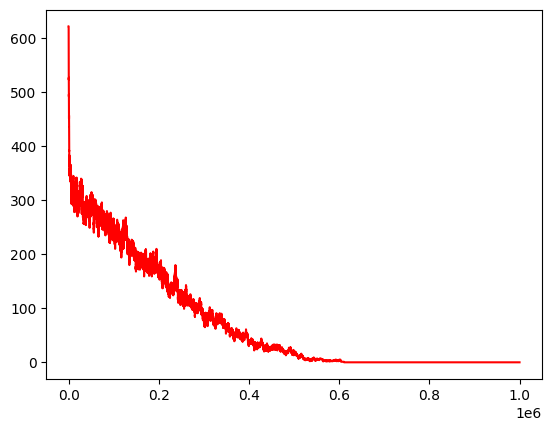

In [19]:
plt.plot(y,c = "red")

In [10]:
def Dsatur(adj_list):
    start=time.time_ns()
    n = len(adj_list)
    ind_sets = [[]]
    coloring = [-1 for i in range(n)]
    NC= [i for i in range(n)]

    while NC != []:
        #print(NC)
        s_size = len(ind_sets)
        vertex = vertex_satur(adj_list,coloring,NC)
        c=0
        for i in range(s_size):
            if ind_check(adj_list,ind_sets[i],vertex) == 1:
                ind_sets[i].append(vertex)
                coloring[vertex] = i
                break
            else:
                c+=1
        if c >= s_size:
            ind_sets.append([vertex])
            coloring[vertex] = c
    
        #print(vertex)
        NC.remove(vertex)
        #print("esta es NC al retirar " +str(vertex))
        #print(NC)
    tiempo_ejecucion = timeSince(start)
    return coloring,ind_sets,tiempo_ejecucion
        
            
                
            
        




/tmp/ipykernel_77/1991980737.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g)


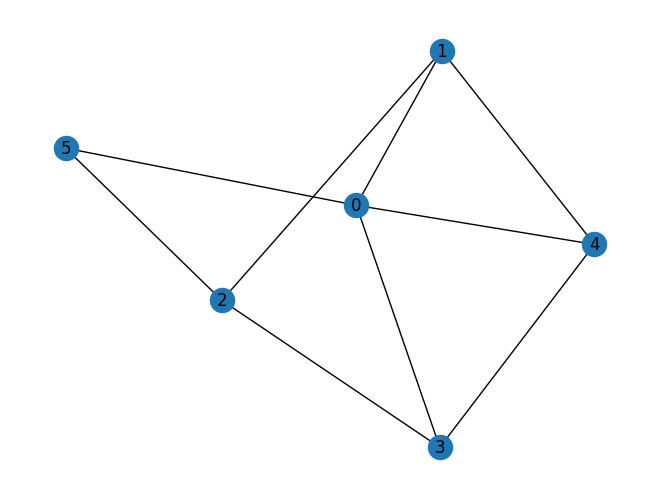

In [27]:
#random.seed(100)
random.seed(6969)
g = nx.erdos_renyi_graph(6,0.5)
A = nx.adjacency_matrix(g)
B = scipy.sparse.csr_matrix.toarray(A)
C = convert(B)

nx.draw(g,with_labels=True)
# max_degree(C,[0,1,2,3,4,5])

In [28]:
color_map=[]
for node in g:
    if x[node]==0:
        color_map.append("orange")
    if x[node]==1:
        color_map.append("red")
    if x[node]==2:
        color_map.append("green")
    if x[node]==3:
        color_map.append("purple")




In [32]:
g2=nx.turan_graph(100,10)
A2=nx.adjacency_matrix(g2)
B2 = scipy.sparse.csr_matrix.toarray(A2)
C2 = ts.adjacenecy_matrix_to_adjacency_list(B2)
D2 = convert(B2)
E2 = Dsatur(D2)[1]





/tmp/ipykernel_77/1235760368.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A2=nx.adjacency_matrix(g2)


In [34]:
P = partition(len(D2))
P
#s_annealing(D,10000,P)

[[30],
 [62],
 [29],
 [37, 89, 90],
 [83],
 [39],
 [53, 93],
 [40],
 [77, 98],
 [13],
 [9],
 [57],
 [72],
 [20, 71, 94],
 [66, 92],
 [12],
 [82],
 [8, 68],
 [47, 96],
 [50],
 [80],
 [43],
 [6],
 [5, 58],
 [99],
 [32],
 [33],
 [38],
 [23],
 [31, 85],
 [16, 41],
 [46],
 [64],
 [11, 18, 55, 95],
 [28],
 [1],
 [4, 75],
 [74],
 [14, 34],
 [24],
 [69],
 [3, 26],
 [52, 84],
 [91, 97],
 [81],
 [21],
 [35, 79],
 [59],
 [45, 78],
 [48],
 [63, 73],
 [10, 25, 86],
 [17],
 [0],
 [22, 42, 51],
 [54],
 [70],
 [49, 65],
 [60],
 [76],
 [56],
 [87, 88],
 [19],
 [2, 36],
 [15],
 [7, 61],
 [27, 44, 67]]

In [35]:
coloreo,numero = ts.greedy_coloring(B2)

In [36]:
myList= coloreo.items()
print(type(myList))
print(myList)
coloracion = list(myList)
print(coloracion)

<class 'dict_items'>
dict_items([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (30, 3), (31, 3), (32, 3), (33, 3), (34, 3), (35, 3), (36, 3), (37, 3), (38, 3), (39, 3), (40, 4), (41, 4), (42, 4), (43, 4), (44, 4), (45, 4), (46, 4), (47, 4), (48, 4), (49, 4), (50, 5), (51, 5), (52, 5), (53, 5), (54, 5), (55, 5), (56, 5), (57, 5), (58, 5), (59, 5), (60, 6), (61, 6), (62, 6), (63, 6), (64, 6), (65, 6), (66, 6), (67, 6), (68, 6), (69, 6), (70, 7), (71, 7), (72, 7), (73, 7), (74, 7), (75, 7), (76, 7), (77, 7), (78, 7), (79, 7), (80, 8), (81, 8), (82, 8), (83, 8), (84, 8), (85, 8), (86, 8), (87, 8), (88, 8), (89, 8), (90, 9), (91, 9), (92, 9), (93, 9), (94, 9), (95, 9), (96, 9), (97, 9), (98, 9), (99, 9)])
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9,

In [40]:
#sim_ann=s_annealing(D2,5000000,P)

KeyboardInterrupt: 

[ 0. 67. 66. ... 51. 51. 52.]


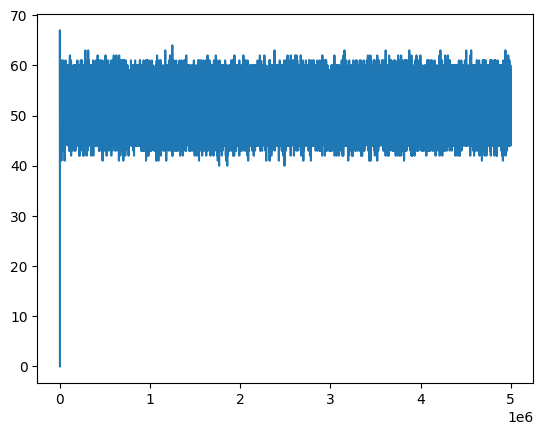

In [ ]:
# H_inv = sim_ann[3][::-1]
# print(sim_ann[1])
# plt.plot(sim_ann[1])

In [102]:
def objective_function(adj_list,index,color,C):
    s=0
    for j in adj_list[index]:
        if C[j] == color:
            s+=1
    return s


def s_annealing_color_fijo(adj_list,t,colors,new_list):
    inicial_value = new_list
    start = time.time_ns()
    key_value=len(new_list)

    if key_value==0:
        n = len(adj_list)
        B=0.8
        rate=1.005
        vertex = [i for i in range(n)]
        choices = [i for i in range(colors)]      #posibles colores
        coloring = np.random.randint(0,colors,n)  #coloreamiento inicial
        H = np.zeros(t)                           #valores de H
        H0 = 0
        for j in range(n):
            H0 = H0 + objective_function(adj_list,j,coloring[j],coloring)
        H0= H0/2
        H[0]=H0
        indexf=0
        for z in range(1,t):
            if indexf % 1500 == 0:
                B = B *rate
            v = random.choice(vertex)    
            new_color = random.choice(choices)
            delta = objective_function(adj_list,v,new_color,coloring)-objective_function(adj_list,v,coloring[v],coloring)
            if delta <= 0:
                coloring[v]=new_color
                H[z]=H[z-1] + delta
            if delta > 0:
                prob = np.exp(-B*delta)
                uniform = np.random.random()
                if uniform <= prob:
                    coloring[v]=new_color
                    H[z]=H[z-1] + delta
                else:
                    H[z]=H[z-1]
            if H[z]== 0:
                for l in range(z,t):
                    H[l]= 0
                    tiempo_ejecucion = timeSince(start)
                    return coloring, H,tiempo_ejecucion
            
            indexf += 1
        
        tiempo_ejecucion = timeSince(start)
        return coloring,H,tiempo_ejecucion
    else:
        n = len(adj_list)
        B=0.8
        rate=1.005
        vertex = [i for i in range(n)]
        choices = [i for i in range(colors)]      #posibles colores
        p_sets=create_psets(new_list)
        u =random.choice(p_sets)
        for v in u:
            arrives = random.choice(p_sets)
            while arrives == u:
                arrives = random.choice(p_sets)
            new_color_vertex = random.choice(arrives)
            new_list[v] = new_list[new_color_vertex]
        coloring = new_list  #coloreamiento inicial
        H = np.zeros(t)                           #valores de H
        H0 = 0
        for j in range(n):
            H0 = H0 + objective_function(adj_list,j,coloring[j],coloring)
        H0= H0/2
        H[0]=H0
        indexf=0
        for z in range(1,t):
            if indexf % 1500 == 0:
                B = B *rate
            v = random.choice(vertex)    
            new_color = random.choice(choices)
            delta = objective_function(adj_list,v,new_color,coloring)-objective_function(adj_list,v,coloring[v],coloring)
            if delta <= 0:
                coloring[v]=new_color
                H[z]=H[z-1] + delta
            if delta > 0:
                prob = np.exp(-B*delta)
                uniform = np.random.random()
                if uniform <= prob:
                    coloring[v]=new_color
                    H[z]=H[z-1] + delta
                else:
                    H[z]=H[z-1]
            if H[z]== 0:
                for l in range(z,t+1):
                    H[l]= 0
                    tiempo_ejecucion = timeSince(start)
                    return coloring, H,tiempo_ejecucion
            
            indexf += 1
        coloring = inicial_value
        tiempo_ejecucion = timeSince(start)
        return coloring,H,tiempo_ejecucion




In [99]:
for i in range(3,4):
    print(i)


3


In [84]:
random.seed(10)
grafo1 = nx.erdos_renyi_graph(1000,0.005)
A = nx.adjacency_matrix(grafo1)
B = scipy.sparse.csr_matrix.toarray(A)
C = convert(B)



x,y,z= s_annealing_color_fijo(C,1000000,100,[])
print(min(y))

x4,y4,z4 = s_annealing_color_fijo(C,1000000,4,[])
print(min(y4))



/tmp/ipykernel_77/1773171848.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(grafo1)
0.0
0.0


In [108]:
def array_to_dict(array):
    n = len(array)
    lista = {}
    for i in range(n):
        lista[i] = array[i]
    return lista

In [22]:
C2 = ts.adjacenecy_matrix_to_adjacency_list(B) 
D2 = array_to_dict(x)
colores = len(x)

#TabuSearch.tabu_search()

#sim_ex= s_annealing_color_fijo(C,1)

In [ ]:
tabu1 = ts.tabu_search(C2,D2,colores,5000,50)

112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361


In [106]:
def simulated_annealing_final(adj_list,t,colors,TIME):
    start = time.time_ns()
    H = 0
    c_current,h_current,w = s_annealing_color_fijo(adj_list,t,colors,[])
    H = min(h_current)
    col_final=colors
    final_coloring = c_current
    #print(c_current)
    while H == 0:
        col_final = len(np.unique(c_current))
        final_coloring = c_current
        print("actualice final_coloring a " + str(c_current))
        #print(final_coloring)
        hora = timeSince(start)
        if hora > TIME:
            print("exceso de hora")
            print(final_coloring)
            return final_coloring,col_final
        else:
            #print(c_current)
            c_current,h_new,g = s_annealing_color_fijo(adj_list,t,col_final-1,final_coloring) #final_coloring
            H = min(h_new)
            #print(H)
            #print(c_current)
    
    #print(final_coloring)
    return final_coloring,col_final


        



In [163]:
##PRUEBAS PARA LA PRESENTACION
random.seed(6)
grafo1 = nx.erdos_renyi_graph(,1)
A = nx.adjacency_matrix(grafo1)
B = scipy.sparse.csr_matrix.toarray(A)
C = convert(B)
x,y,z= s_annealing_color_fijo(C,1000000,100,[])

C2 = ts.adjacenecy_matrix_to_adjacency_list(B) 
D2 = array_to_dict(x)
colores = len(x)




/tmp/ipykernel_77/3651964207.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(grafo1)


In [164]:
a,b = simulated_annealing_final(C,100000000,100,120)



actualice final_coloring a [54 14 97 27 18 78 69 95 38 65 32 42 61 63 93 60 15 76 51 39 99 90  9 25
 86 68 36 45 30 56 19 82 57 50 62 88 84 11 71 37]
actualice final_coloring a [54 14 97 27 18 78 69 95 38 65 32 42 61 63 93 60  2 76 51 39 99 28  9 25
 86 68 36 45 30 37 19 82 57 50 62 88 84 11 71 15]


KeyboardInterrupt: 

In [157]:
b

43

In [165]:
ds = Dsatur(C)

In [166]:
colorsd= len(np.unique(ds[0]))
colorsd

40

In [160]:
tabu1 = ts.tabu_search(C2,D2,colores,5000,60)

Found coloring: 63
Found coloring: 63
Found coloring: 63
Found coloring: 63
Found coloring: 62
Found coloring: 62
Found coloring: 61
1
Found coloring: 61
Found coloring: 61
Found coloring: 61
Found coloring: 61
Found coloring: 61
Found coloring: 60
Found coloring: 59
Found coloring: 58
Found coloring: 58
Found coloring: 57
Found coloring: 56
Found coloring: 55
Found coloring: 55
Found coloring: 55
Found coloring: 54
Found coloring: 53
Found coloring: 53
Found coloring: 53
1
Found coloring: 53
Found coloring: 53
Found coloring: 52
Found coloring: 52
Found coloring: 53
Found coloring: 53
Found coloring: 52
Found coloring: 52
Found coloring: 52
Found coloring: 51
Found coloring: 50
Found coloring: 49
1
Found coloring: 48
Found coloring: 48
Found coloring: 48
Found coloring: 48
Found coloring: 48
Found coloring: 48
Found coloring: 48
Found coloring: 47
Found coloring: 47
Found coloring: 46
Found coloring: 46
Found coloring: 45
Found coloring: 44
Found coloring: 45
1
2
Found coloring: 45
Fo

In [161]:
tabu1[3]

3

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12b3972d-d948-4710-91e7-f320364f32a3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>